In [148]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
original_fuel=pd.read_csv('/content/drive/MyDrive/fuel_cost.csv',delimiter=',')
print(original_fuel.head())

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   rowid  plant_id_eia plant_id_eia_label report_date contract_type_code  \
0      1             3              Barry  01-01-2008                  C   
1      2             3              Barry  01-01-2008                  C   
2      3             3              Barry  01-01-2008                  C   
3      4             7            Gadsden  01-01-2008                  C   
4      5             7            Gadsden  01-01-2008                  S   

  contract_type_code_label contract_expiration_date energy_source_code  \
0                        C               01-04-2008                BIT   
1                        C               01-04-2008                BIT   
2                        C                      NaN                 NG   
3                        C               01-12-2015                BIT   
4                        S               01-11-2008                BIT   

  energy_source_code_label fuel_type_code_pudl  ...  \
0                      BIT                c

#REMOVED COLUMNS WHICH ARE DUPLICATE AND NOT NEEDED.

In [151]:
columns_needed = original_fuel[['plant_id_eia','fuel_received_units','fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_group_code','fuel_cost_per_mmbtu']]
print(columns_needed)

        plant_id_eia  fuel_received_units  fuel_mmbtu_per_unit  \
0                  3               259412               23.100   
1                  3                52241               22.800   
2                  3              2783619                1.039   
3                  7                25397               24.610   
4                  7                  764               24.446   
...              ...                  ...                  ...   
608560         62115              1423630                1.033   
608561         62565              2769452                1.041   
608562         63335                45343                1.020   
608563         63688                82501                1.020   
608564         64020                12255                1.053   

        sulfur_content_pct  ash_content_pct  mercury_content_ppm  \
0                     0.49              5.4                  NaN   
1                     0.48              5.7                  NaN   
2  

These are the columns needed for analyzing the data.

In [152]:
columns_needed.isnull().sum()

plant_id_eia                0
fuel_received_units         0
fuel_mmbtu_per_unit         0
sulfur_content_pct          0
ash_content_pct             0
mercury_content_ppm    289482
fuel_group_code             1
fuel_cost_per_mmbtu    200240
dtype: int64

In [153]:
columns_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608565 entries, 0 to 608564
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   plant_id_eia         608565 non-null  int64  
 1   fuel_received_units  608565 non-null  int64  
 2   fuel_mmbtu_per_unit  608565 non-null  float64
 3   sulfur_content_pct   608565 non-null  float64
 4   ash_content_pct      608565 non-null  float64
 5   mercury_content_ppm  319083 non-null  float64
 6   fuel_group_code      608564 non-null  object 
 7   fuel_cost_per_mmbtu  408325 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 37.1+ MB


converting categorical data to numerical dad

In [ ]:
columns_needed["fuel_group_code"] =columns_needed["fuel_group_code"].astype('category')
columns_needed["fuel_group_code"] = columns_needed["fuel_group_code"].cat.codes

imputing the missing values with median

In [ ]:
columns_needed['mercury_content_ppm'] = columns_needed['mercury_content_ppm'].fillna(columns_needed['mercury_content_ppm'].median())
columns_needed['fuel_group_code'] = columns_needed['fuel_group_code'].fillna(columns_needed['fuel_group_code'].median())
columns_needed['fuel_cost_per_mmbtu'] = columns_needed['fuel_cost_per_mmbtu'].fillna(columns_needed['fuel_cost_per_mmbtu'].median())

In [156]:
columns_needed.isnull().sum()

plant_id_eia           0
fuel_received_units    0
fuel_mmbtu_per_unit    0
sulfur_content_pct     0
ash_content_pct        0
mercury_content_ppm    0
fuel_group_code        0
fuel_cost_per_mmbtu    0
dtype: int64

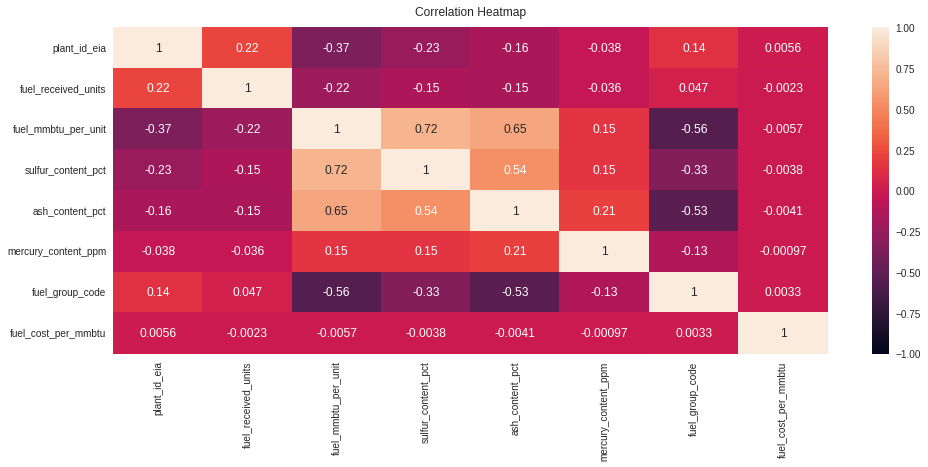

In [157]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(columns_needed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

the correlation heatmap to understand the relation between each of the variables.

In [158]:
columns_needed1 = columns_needed.sample(12000)

consider only 2% of the data

In [159]:
columns_needed1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [160]:
columns_needed1.fillna(999, inplace=True)

In [161]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(columns_needed1, train_size = 0.8334, random_state=1224)

In [162]:
print(len(train_df))

10000


In [163]:
print(len(test_df))

2000


scaling the train data

In [164]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(train_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['plant_id_eia','fuel_received_units','fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_cost_per_mmbtu','fuel_group_code'])
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,plant_id_eia,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,fuel_group_code
0,-0.715546,-0.171767,0.906193,-0.115960,0.265884,-0.121929,-0.981868,-0.042738
1,-0.477459,-0.181887,-0.791768,-0.506274,-0.541082,-0.121929,0.178458,0.012885
2,1.387874,-0.321071,-0.788082,-0.506274,-0.541082,-0.121929,0.178458,-0.030377
3,1.612330,-0.255179,-0.788082,-0.506274,-0.541082,-0.121929,0.178458,-0.030377
4,1.607479,-0.324541,-0.788798,-0.506274,-0.541082,-0.121929,0.178458,-0.030377


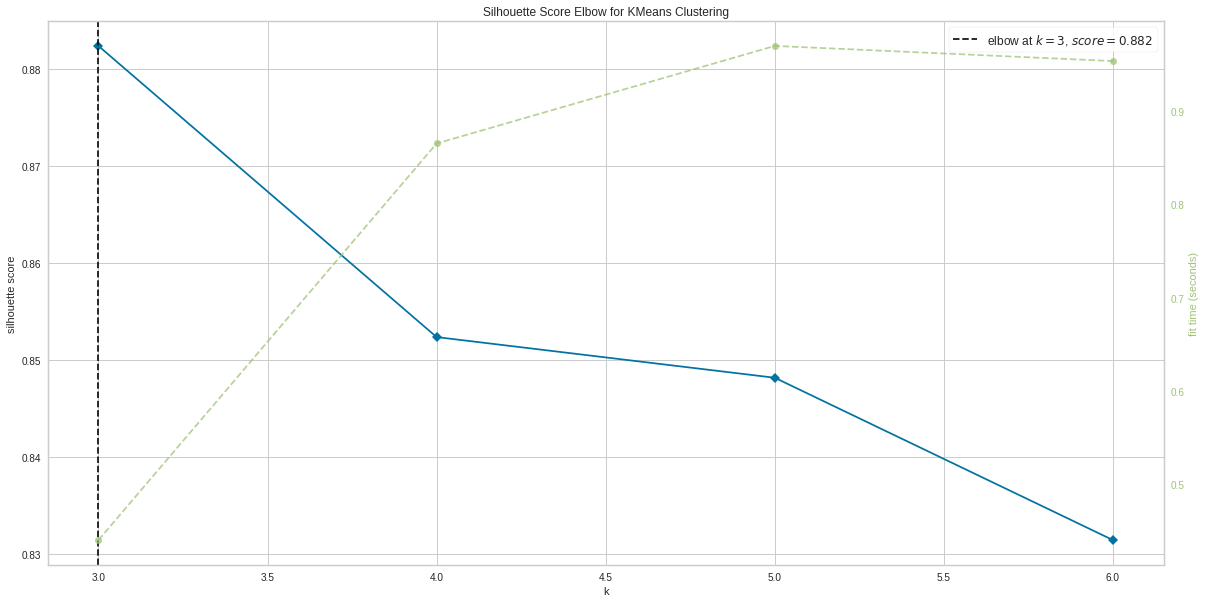

In [165]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,7),metric='silhouette', timings= True)
visualizer.fit(train_df)        # Fit the data to the visualizer
visualizer.show()

Silhouette score method to find the optimal value of k.

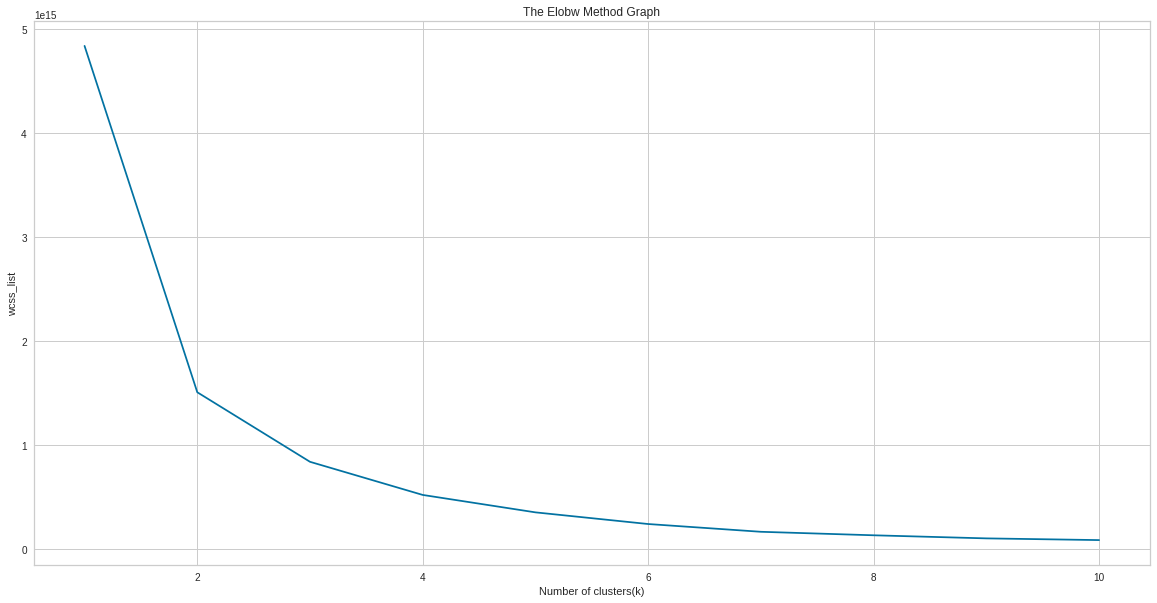

In [166]:

   #finding optimal number of clusters using the elbow method 
   import matplotlib.pyplot as mtp 
   from sklearn.cluster import KMeans  
   wcss_list = []  #Initializing the list for the values of WCSS  
  
   #Using for loop for iterations from 1 to 10.  
   for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)  
    kmeans.fit(train_df)  
    wcss_list.append(kmeans.inertia_)  
   mtp.plot(range(1, 11), wcss_list)  
   mtp.title('The Elobw Method Graph')  
   mtp.xlabel('Number of clusters(k)')  
   mtp.ylabel('wcss_list')  
   mtp.show()

both WSS and silhouette methods plotted k value as 3. K was chose based on these plots and also these each of the clusters have high similarities within and large variation among them.

The WSS Elbow method to find the optimal value of k.

In [167]:
#Importing required modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df_scaled)
 
df.shape

(10000, 2)

In [168]:

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[1 0 2 ... 2 0 0]


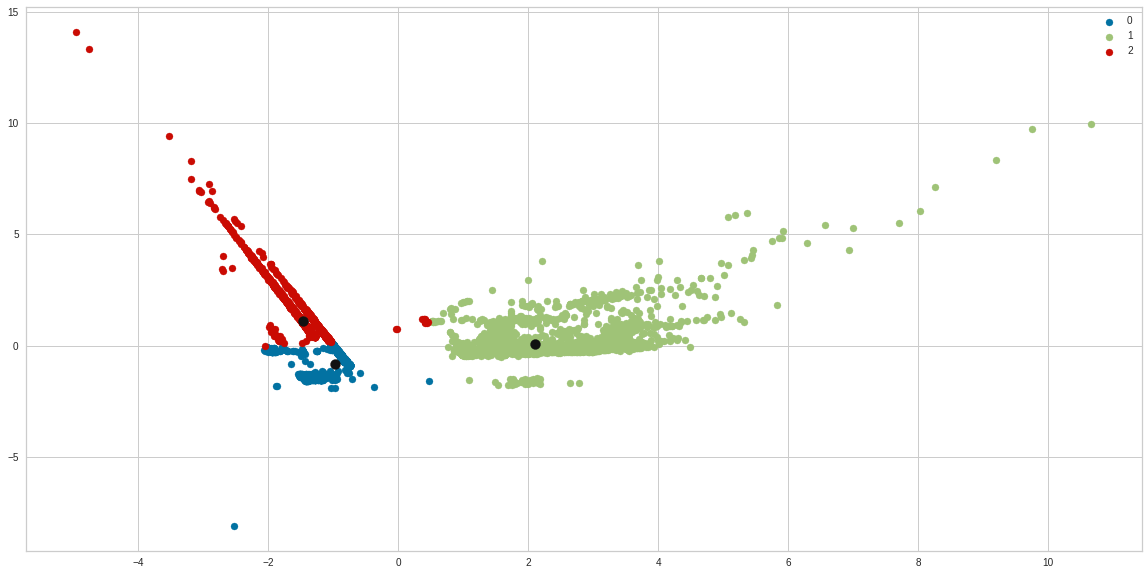

In [169]:

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
plt.rcParams["figure.figsize"] = (20,10)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

plotting the three clusters.

In [170]:
cluster_zero= train_df[label==0]
cluster_zero

,plant_id_eia,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_group_code,fuel_cost_per_mmbtu
28230,7552,108679,1.000,0.0,0.0,0.0,1,10.724
561021,7032,35952,1.068,0.0,0.0,0.0,1,1.493
46623,535,9,1.000,0.0,0.0,0.0,1,6.933
441937,4014,37,1.026,0.0,0.0,0.0,1,6.765
42881,2963,134400,1.019,0.0,0.0,0.0,1,6.757
...,...,...,...,...,...,...,...,...
507898,1417,899,1.020,0.0,0.0,0.0,1,2.030
480645,2517,660002,1.026,0.0,0.0,0.0,1,3.382
261483,6181,6151,1.036,0.0,0.0,0.0,1,3.219
21303,2713,1769,5.800,0.2,0.0,0.0,3,29.027


In [209]:
zm = cluster_zero["fuel_cost_per_mmbtu"].mean()
print(zm)

16.31573941453215


In [180]:
dups = cluster_zero.pivot_table(columns=['fuel_group_code'], aggfunc='size')
print (dups)
#1-natural gas
#3-petroleum

fuel_group_code
1    2899
2       9
3     916
4       2
dtype: int64


In [172]:
print(cluster_zero['fuel_group_code'].mode())

0    1
dtype: int8


In [173]:
cluster_one=train_df[label==1]
cluster_one

,plant_id_eia,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_group_code,fuel_cost_per_mmbtu
68397,2103,115714,17.580,0.39,5.20,0.0,0,1.148
221395,2324,11223,22.000,0.38,11.90,0.0,0,2.874
316522,2080,15131,17.632,0.42,5.70,0.0,0,1.902
128703,3140,12019,24.950,1.25,11.70,0.0,0,3.276
396575,50835,17248,25.570,2.24,7.50,0.0,0,3.276
...,...,...,...,...,...,...,...,...
33946,8066,214422,18.797,0.48,9.00,0.0,0,0.867
599696,1702,15889,17.536,0.20,4.40,0.0,0,2.093
99582,4078,44278,17.760,0.31,5.00,0.0,0,1.944
304816,3954,15834,23.977,1.80,17.10,0.0,0,2.672


In [181]:
dups = cluster_one.pivot_table(columns=['fuel_group_code'], aggfunc='size')
print (dups)
#0-coal
#1-natural gas
#3-petroleum

fuel_group_code
0    3530
4      44
dtype: int64


In [201]:
zm = cluster_one["fuel_cost_per_mmbtu"].mean()
print(zm)

2.699217123670957


In [175]:

print(cluster_one['fuel_group_code'].mode())

0    0
dtype: int8


In [202]:
cluster_two=train_df[label==2]
cluster_two

,plant_id_eia,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_group_code,fuel_cost_per_mmbtu
591750,50243,11927,1.036,0.0,0.0,0.0,1,3.276
116722,55380,57731,1.036,0.0,0.0,0.0,1,3.276
61377,55269,9515,1.029,0.0,0.0,0.0,1,3.276
249750,56476,400,1.021,0.0,0.0,0.0,2,2.600
458485,56196,212722,1.028,0.0,0.0,0.0,1,2.680
...,...,...,...,...,...,...,...,...
602087,55938,82,1.065,0.0,0.0,0.0,1,3.276
579786,55243,33706,1.030,0.0,0.0,0.0,1,3.276
480608,2336,2674357,1.044,0.0,0.0,0.0,1,2.384
526056,55141,419,1.027,0.0,0.0,0.0,1,2.128


In [208]:
zm = cluster_two["fuel_cost_per_mmbtu"].mean()
print(zm)

4.994497692307692


In [178]:
print(cluster_two['fuel_group_code'].mode())

0    1
dtype: int8


In [182]:
dups= cluster_two.pivot_table(columns=['fuel_group_code'], aggfunc='size')
print (dups)
#0-coal
#1-natural gas
#3-petroleum
#2-other gases

fuel_group_code
0      16
1    2556
2      27
3       1
dtype: int64


#From the analysis it can be said that, although cluster 1 which has a fuel group as coal is very inexpensive whilst compared to the other two groups, it has contaminants like ash, Sulphur and mercury that cause greenhouse gases. Our focus is to determine the type of fuel which is both environmentally friendly and cost friendly. Well, in that case, cluster 2 which has a fuel group as natural gas has many approving attributes such as reasonable cost concerning the fuel units it is receiving and has practically zero impurities. From this, Natural Gas can be suggested to US Power Generation.